# Solution for SpaceShip-Titanic Comp
@ Author: Abdelrahman Hanafy <br>
@ Date: Mon, June 27

## Check Also
- This is my code for the orignal version of the problem: https://www.kaggle.com/code/abdelrahmanhanafy/titanic

In [396]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data Explore

In [397]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
out_sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")


In [398]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [399]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [400]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [401]:
print(train_df.isna().sum())
print("-"*40)
print(test_df.isna().sum())


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [402]:
train_df.describe(include=np.number)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [403]:
train_df.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# Wranggling

In [404]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
# Create our imputer to replace missing values 
imp = SimpleImputer(strategy='median')
imp = imp.fit(train_df[imputer_cols])

train_df[imputer_cols] = imp.transform(train_df[imputer_cols])
test_df[imputer_cols] = imp.transform(test_df[imputer_cols])
train_df["HomePlanet"].fillna('Z', inplace=True)
test_df["HomePlanet"].fillna('Z', inplace=True)

In [405]:
print(train_df.isna().sum())
print("-"*40)
print(test_df.isna().sum())


PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet        0
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64


In [406]:
train_df['AgeRange'] = pd.cut(train_df.Age,[0,5,18,40,65,90],labels=["Chlid","Teen","Adult","Middle","old"], include_lowest=True)
test_df['AgeRange'] = pd.cut(test_df.Age,[0,5,18,40,65,90],labels=["Chlid","Teen","Adult","Middle","old"], include_lowest=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8693 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  AgeRange      8693 non-null   category
dtypes: bool(1), category(1), float64(6), object(7)
memory usage: 900.2+ KB


In [407]:
train_df["Extra"] = train_df.RoomService+train_df.FoodCourt+train_df.ShoppingMall+\
                    train_df.Spa+train_df.VRDeck
test_df["Extra"] = test_df.RoomService+test_df.FoodCourt+test_df.ShoppingMall+\
                    test_df.Spa+test_df.VRDeck

In [408]:
Extra = pd.cut(train_df.Extra, 3)
Extra.value_counts()

(-35.987, 11995.667]      8569
(11995.667, 23991.333]     108
(23991.333, 35987.0]        16
Name: Extra, dtype: int64

In [409]:
cabin_df = pd.DataFrame()
cabin_df[["deck","num","side"]]=train_df.Cabin.str.split("/",expand=True)
train_df = pd.concat([train_df, cabin_df.reset_index(drop=True)], axis=1)
cabin_df = pd.DataFrame()
cabin_df[["deck","num","side"]]=test_df.Cabin.str.split("/",expand=True)
test_df = pd.concat([test_df, cabin_df.reset_index(drop=True)], axis=1)

In [410]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeRange,Extra,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adult,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Middle,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen,1091.0,F,1,S


In [411]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8693 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  AgeRange      8693 non-null   category
 15  Extra         8693 non-null   float64 
 16  deck          8494 non-null   object  
 17  num           8494 non-null   object  
 18  side    

# EDA

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


<AxesSubplot:xlabel='Transported', ylabel='count'>

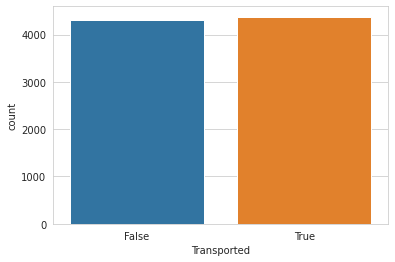

In [413]:
sns.countplot(data=train_df,x="Transported")

<AxesSubplot:xlabel='Age'>

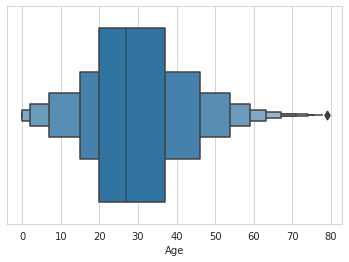

In [414]:
sns.boxenplot(data=train_df,x="Age")

<AxesSubplot:>

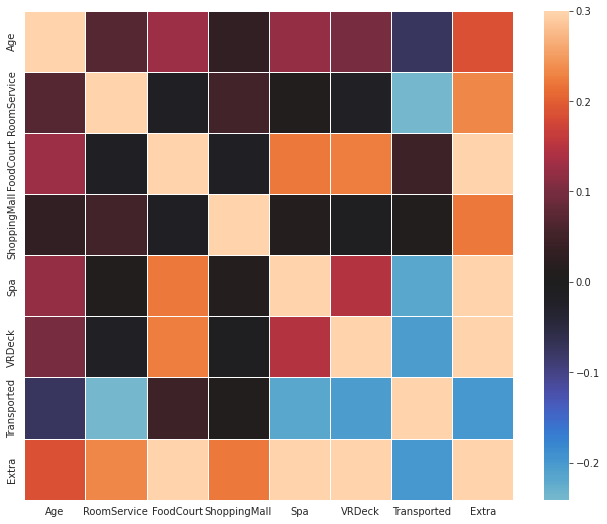

In [415]:
# Compute the correlation matrix
corr = train_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5)

<AxesSubplot:ylabel='Destination'>

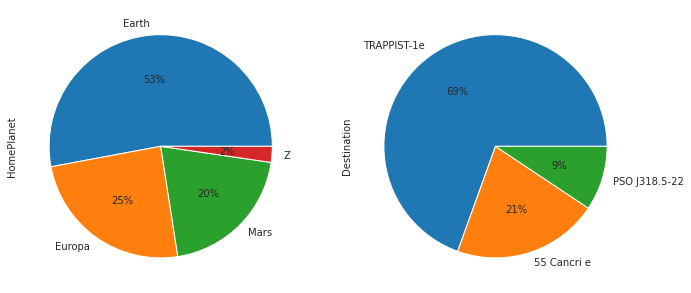

In [416]:
f, axs = plt.subplots(1,2,figsize=(11, 9))
train_df.HomePlanet.value_counts().plot.pie(autopct='%.0f%%',ax = axs[0])
train_df.Destination.value_counts().plot.pie(autopct='%.0f%%',ax = axs[1])

<AxesSubplot:xlabel='Destination', ylabel='count'>

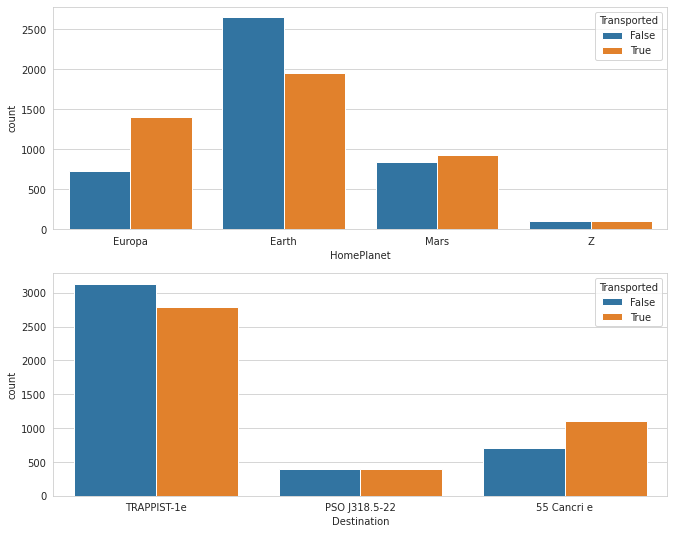

In [417]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="HomePlanet",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="Destination",hue="Transported",ax=axs[1])

<AxesSubplot:xlabel='Extra', ylabel='Age'>

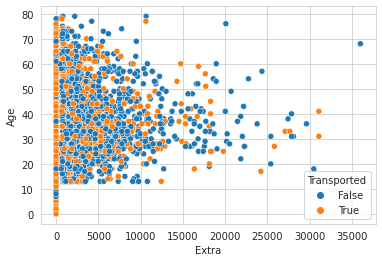

In [418]:
sns.scatterplot(data=train_df,x="Extra",y="Age",hue="Transported")

<AxesSubplot:xlabel='side', ylabel='count'>

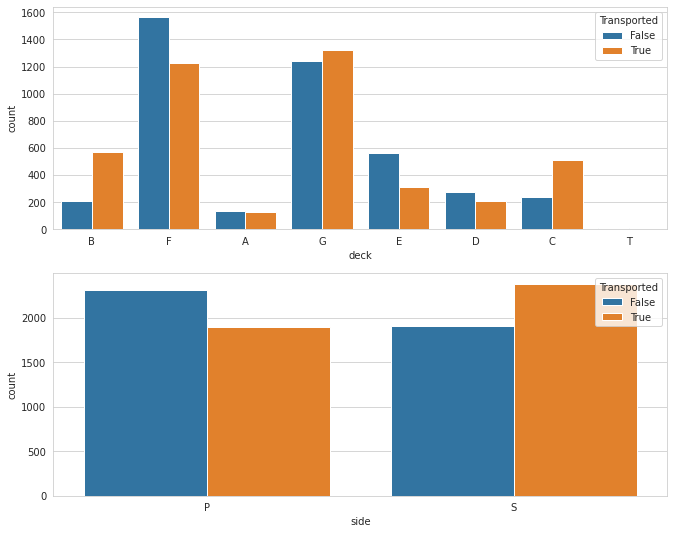

In [419]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="deck",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="side",hue="Transported",ax=axs[1])

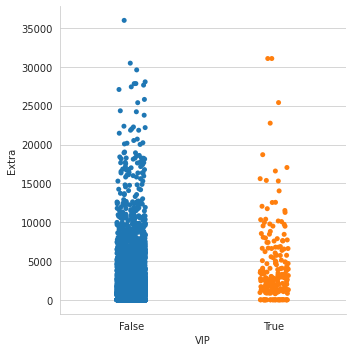

In [420]:
sns.catplot(x="VIP", y="Extra", data=train_df)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

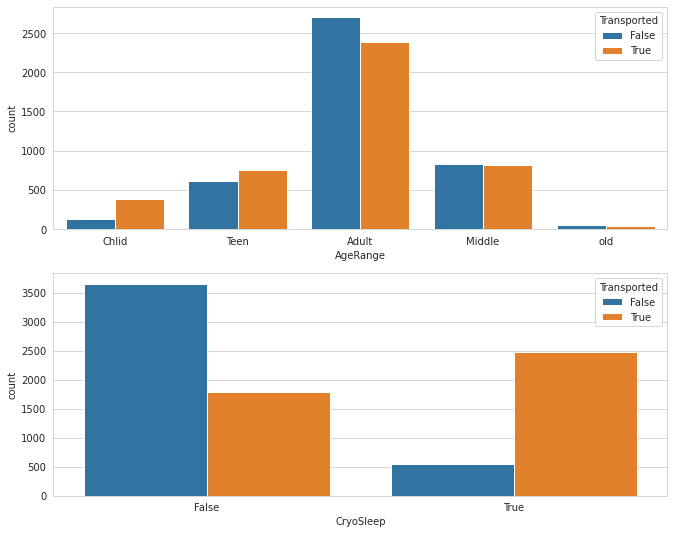

In [421]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="AgeRange",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="CryoSleep",hue="Transported",ax=axs[1])

In [422]:
train = train_df.drop(["PassengerId","Name" ,"Cabin","num"] , axis = 1)

In [423]:
print(train.isna().sum())

HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
AgeRange          0
Extra             0
deck            199
side            199
dtype: int64


<AxesSubplot:xlabel='AgeRange', ylabel='count'>

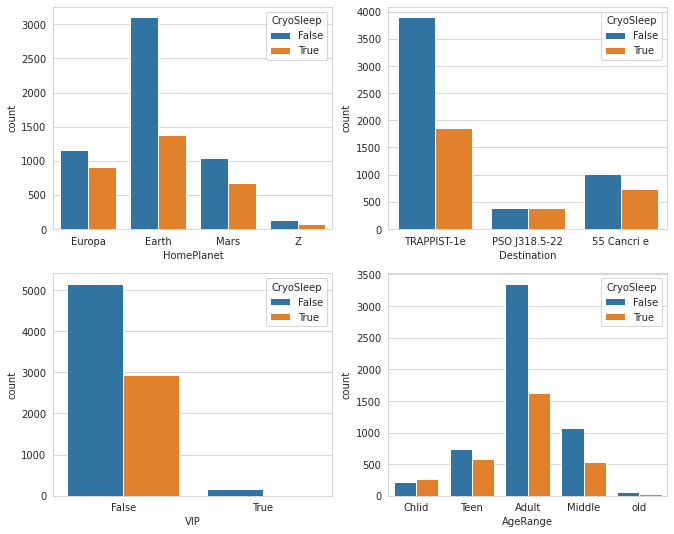

In [424]:
f, axs = plt.subplots(2,2,figsize=(11, 9))
sns.countplot(data=train_df,x="HomePlanet",hue="CryoSleep",ax=axs[0][0])
sns.countplot(data=train_df,x="Destination",hue="CryoSleep",ax=axs[0][1])
sns.countplot(data=train_df,x="VIP",hue="CryoSleep",ax=axs[1][0])
sns.countplot(data=train_df,x="AgeRange",hue="CryoSleep",ax=axs[1][1])


<AxesSubplot:xlabel='AgeRange', ylabel='count'>

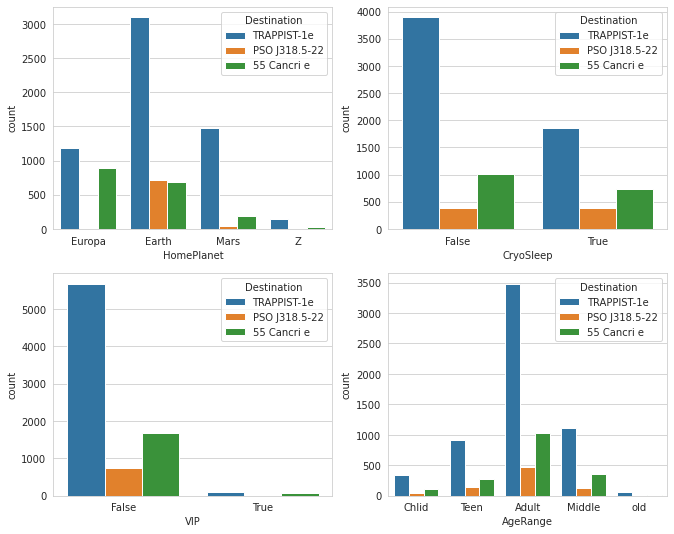

In [425]:
f, axs = plt.subplots(2,2,figsize=(11, 9))
sns.countplot(data=train_df,x="HomePlanet",hue="Destination",ax=axs[0][0])
sns.countplot(data=train_df,x="CryoSleep",hue="Destination",ax=axs[0][1])
sns.countplot(data=train_df,x="VIP",hue="Destination",ax=axs[1][0])
sns.countplot(data=train_df,x="AgeRange",hue="Destination",ax=axs[1][1])


# ML models

In [426]:
#importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Models that handle NaN values 

#### encoding

In [427]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8693 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8693 non-null   float64 
 8   FoodCourt     8693 non-null   float64 
 9   ShoppingMall  8693 non-null   float64 
 10  Spa           8693 non-null   float64 
 11  VRDeck        8693 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  AgeRange      8693 non-null   category
 15  Extra         8693 non-null   float64 
 16  deck          8494 non-null   object  
 17  num           8494 non-null   object  
 18  side    

In [428]:
label_cols = ["HomePlanet", "CryoSleep","deck","side","Destination" ,"AgeRange"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train_df,test_df ,label_cols)

In [431]:
train.drop(["PassengerId","Cabin" ,"VIP","Name","num"] , axis = 1,inplace=True)
test.drop(["PassengerId","Cabin" ,"VIP","Name","num"] , axis = 1,inplace=True)

In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Transported   8693 non-null   bool   
 10  AgeRange      8693 non-null   int64  
 11  Extra         8693 non-null   float64
 12  deck          8693 non-null   int64  
 13  side          8693 non-null   int64  
dtypes: bool(1), float64(7), int64(6)
memory usage: 891.5 KB


In [433]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Transported   8693 non-null   bool   
 10  AgeRange      8693 non-null   int64  
 11  Extra         8693 non-null   float64
 12  deck          8693 non-null   int64  
 13  side          8693 non-null   int64  
dtypes: bool(1), float64(7), int64(6)
memory usage: 891.5 KB


In [434]:
Traget = "Transported"

X = train.drop(Traget , axis =1 )
y = train[Traget]

X_train , X_test , y_train , y_test = train_test_split(X , y, random_state = 12 ,test_size =0.33)

scaler = StandardScaler()
scaler.fit(X_train)
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)



#### Confusion Matrix function

In [435]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

def matrix_it(model,X_train, X_test, y_train, y_test):
    print(model.score(X_train,y_train))
    print(model.score(X_test, y_test))
    pred_ = model.predict(X_test)
    #creating confusion matrix to know the errors
    conf = confusion_matrix(y_test, pred_ ,normalize="all")
    disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
    

## XGBClassifier	

In [436]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)

0.8671016483516484
0.7901707912164517


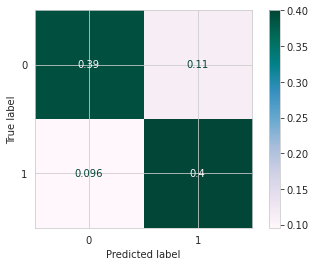

In [437]:
xgb_model.fit(X_std_train,y_train)
matrix_it(xgb_model,X_std_train , X_std_test , y_train , y_test)

0.8671016483516484
0.7901707912164517


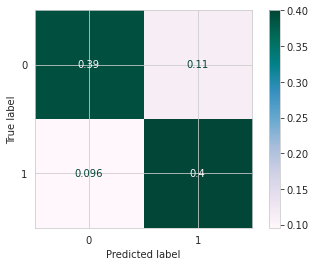

In [438]:
xgb_model.fit(X_train,y_train)
matrix_it(xgb_model,X_train , X_test , y_train , y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


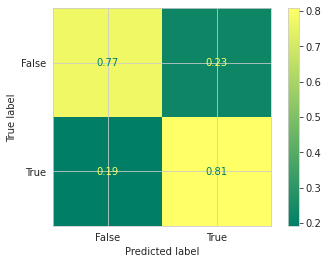

In [527]:
plot_confusion_matrix(xgb_model,
                      X_std_test,
                      y_test,
                      cmap = "summer",
                      normalize = "true");

#### Notes about Features
- Appered to influnce the target but need to work on the NaN Values
    - CryoSleep
    - HomePlanet
    - deck & side of the cabin
    - Destination 

In [ ]:
y = train_df["Transported"]
features = ["CryoSleep","HomePlanet",'deck','side','Destination']
X = pd.get_dummies(train_df[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Suport Vector

0.7929258241758241
0.7779714186127571


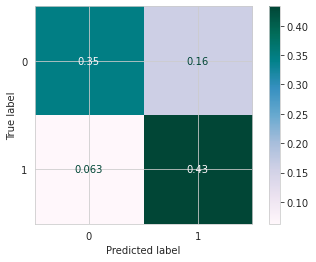

In [439]:
svc = SVC()
svc.fit(X_train,y_train)
matrix_it(svc,X_train, X_test, y_train, y_test)

0.8130151098901099
0.7765772046009063


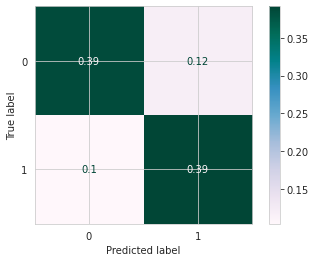

In [440]:
svc.fit(X_std_train,y_train)
matrix_it(svc,X_std_train , X_std_test , y_train , y_test)

## Random Forest

0.8291552197802198
0.7852910421749738


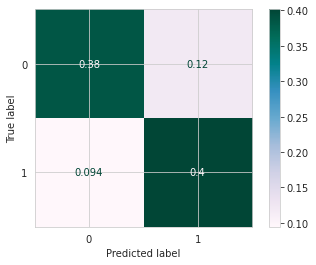

In [441]:
rf = RandomForestClassifier(n_estimators=250, max_depth=7, random_state=1)
rf.fit(X_train,y_train)

matrix_it(rf,X_train, X_test, y_train, y_test)

0.8289835164835165
0.7852910421749738


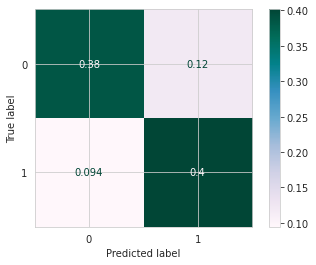

In [442]:
rf.fit(X_std_train,y_train)
matrix_it(rf,X_std_train , X_std_test , y_train , y_test)

## Logistic Regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7877747252747253
0.765074939003137


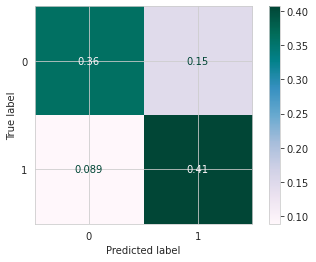

In [443]:
lr = LogisticRegression(random_state=42, C=10)
lr.fit(X_train,y_train)

matrix_it(lr,X_train, X_test, y_train, y_test)

0.792239010989011
0.7689090275357268


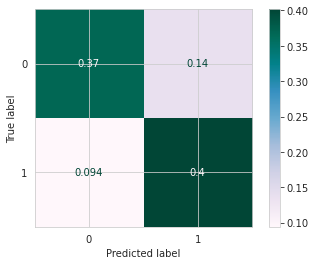

In [444]:
lr.fit(X_std_train,y_train)
matrix_it(lr,X_std_train , X_std_test , y_train , y_test)

# OUTPUT

In [537]:
out_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [538]:
X_out = test
X_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int64  
 3   Age           4277 non-null   float64
 4   RoomService   4277 non-null   float64
 5   FoodCourt     4277 non-null   float64
 6   ShoppingMall  4277 non-null   float64
 7   Spa           4277 non-null   float64
 8   VRDeck        4277 non-null   float64
 9   AgeRange      4277 non-null   int64  
 10  Extra         4277 non-null   float64
 11  deck          4277 non-null   int64  
 12  side          4277 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 434.5 KB


In [539]:
xgb_model.fit(X,y)
pred_ = pd.Series(xgb_model.predict(X_out)).map({0:False, 1:True})
len(pred_)

4277

In [540]:
out_sample["Transported"] = pred_

In [541]:
out_sample.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,2
top,0013_01,True
freq,1,2302


In [542]:
out_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [543]:
out_sample.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [544]:
out_sample.to_csv("submission_xgb_final.csv",index=False)